<a href="https://colab.research.google.com/github/cole-beach/Simple-Neural-Network-Exercise/blob/main/Simple_Neural_Network_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense

In [21]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo: Data Science/Data/heart - heart.csv')
print("The data set has {} rows and {} columns".format(df.shape[0], df.shape[1]))
display(df.head())
display(df.describe())
display(df.dtypes.value_counts())

The data set has 918 rows and 12 columns


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


int64      6
object     5
float64    1
dtype: int64

In [22]:
resting_bp = df['RestingBP'] == 0
cholesterol = df['Cholesterol'] == 0
fasting = df['FastingBS'] == 0

#class_df_clean excludes rows that have no values == 0 in the above columns
class_df_clean = df[~(resting_bp |
                      cholesterol |
                      fasting)]
class_df_clean.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,125.000000,125.000000,125.000000,125.0,125.000000,125.00000,125.000000
mean,57.992000,139.712000,251.752000,1.0,134.616000,1.03440,0.656000
std,7.792155,17.592528,66.200655,0.0,24.779929,0.98112,0.476953
min,39.000000,101.000000,110.000000,1.0,69.000000,0.00000,0.000000
25%,53.000000,130.000000,211.000000,1.0,116.000000,0.00000,0.000000
50%,58.000000,139.000000,245.000000,1.0,135.000000,1.00000,1.000000
75%,63.000000,150.000000,282.000000,1.0,152.000000,1.70000,1.000000
max,75.000000,200.000000,603.000000,1.0,194.000000,4.00000,1.000000


In [23]:
class_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 36 to 914
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             125 non-null    int64  
 1   Sex             125 non-null    object 
 2   ChestPainType   125 non-null    object 
 3   RestingBP       125 non-null    int64  
 4   Cholesterol     125 non-null    int64  
 5   FastingBS       125 non-null    int64  
 6   RestingECG      125 non-null    object 
 7   MaxHR           125 non-null    int64  
 8   ExerciseAngina  125 non-null    object 
 9   Oldpeak         125 non-null    float64
 10  ST_Slope        125 non-null    object 
 11  HeartDisease    125 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 12.7+ KB


In [24]:
total = class_df_clean.isnull().sum().sort_values(ascending=False)
percent = (class_df_clean.isnull().sum()/class_df_clean.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Age,0,0.0
Sex,0,0.0
ChestPainType,0,0.0
RestingBP,0,0.0
Cholesterol,0,0.0
FastingBS,0,0.0
RestingECG,0,0.0
MaxHR,0,0.0
ExerciseAngina,0,0.0
Oldpeak,0,0.0


In [25]:
class_df_clean.duplicated().any()

False

In [26]:
string_col = class_df_clean.select_dtypes(include="object").columns
class_df_clean[string_col]=class_df_clean[string_col].astype("string")

string_col=class_df_clean.select_dtypes("string").columns.to_list()

num_col=class_df_clean.columns.to_list()
#print(num_col)
for col in string_col:
    num_col.remove(col)
num_col.remove("HeartDisease")

class_df_clean.describe().T

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,count,mean,std,min,25%,50%,75%,max
Age,125.0,57.9920,7.792155,39.0,53.0,58.0,63.0,75.0
RestingBP,125.0,139.7120,17.592528,101.0,130.0,139.0,150.0,200.0
Cholesterol,125.0,251.7520,66.200655,110.0,211.0,245.0,282.0,603.0
FastingBS,125.0,1.0000,0.000000,1.0,1.0,1.0,1.0,1.0
MaxHR,125.0,134.6160,24.779929,69.0,116.0,135.0,152.0,194.0
Oldpeak,125.0,1.0344,0.981120,0.0,0.0,1.0,1.7,4.0
HeartDisease,125.0,0.6560,0.476953,0.0,0.0,1.0,1.0,1.0


In [27]:
clean_df=pd.get_dummies(class_df_clean,columns=string_col,drop_first=False)
clean_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
36,65,140,306,1,87,1.5,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
38,48,120,177,1,148,0.0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1
52,45,140,224,1,122,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
84,56,150,213,1,125,1.0,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
86,65,170,263,1,112,2.0,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0


In [28]:
# Define X and y and train test split
X = clean_df.drop(columns = 'HeartDisease')
y = clean_df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
n_cols = X_train.shape[1]
n_cols

20

In [31]:
# Instentiate the model
class_model = Sequential()

# create the first layer with input as the no of features in dataset
class_model.add(Dense(20, activation = 'relu', input_dim = X_train.shape[1]))

# Create hidden layers
class_model.add(Dense(10, activation = 'relu'))

# Create output layer 
# Since this is a binary classification, the activation function of our final layer needs to be 'sigmoid'. 

class_model.add(Dense(1, activation = 'sigmoid'))

In [32]:
class_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

In [33]:
history = class_model.fit(X_train, y_train,
                        validation_data = (X_test, y_test),
                        epochs = 100, verbose=0)

In [34]:
def plot_history(history, metric=None):
  """plot loss and passed metric.  metric is passed as string and must match 'metric'
  argument in the compile step"""
  fig, axes = plt.subplots(2,1, figsize = (5,10))
  axes[0].plot(history.history['loss'], label = "train")
  axes[0].plot(history.history['val_loss'], label='test')
  axes[0].set_title('Loss')
  axes[0].legend()
  if metric:
    axes[1].plot(history.history[metric], label = 'train')
    axes[1].plot(history.history['val_' + metric], label = 'test')
    axes[1].set_title(metric)
    axes[1].legend()

  plt.show()

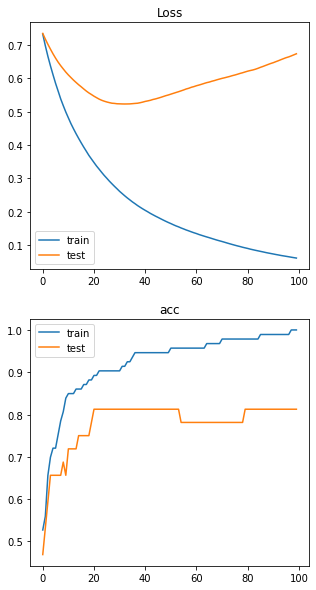

In [35]:
plot_history(history, metric='acc')

Training Scores
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        61

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93



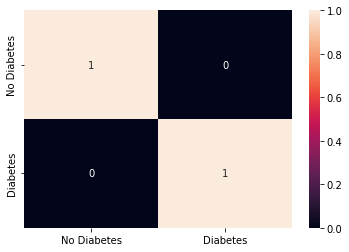



Testing Scores
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        11
           1       0.86      0.86      0.86        21

    accuracy                           0.81        32
   macro avg       0.79      0.79      0.79        32
weighted avg       0.81      0.81      0.81        32



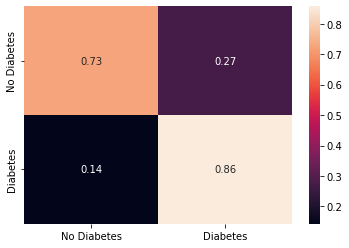

In [36]:
# Make predicitons and evaluate your model
print('Training Scores')

# Define labels for the confusion matrix
labels = ['No Diabetes', 'Diabetes']

# Get training predictions and round them to integers instead of floats
train_preds = np.rint(class_model.predict(X_train))

# Classification Report
print(classification_report(y_train, train_preds))

# Confusion Matrix
conf_mat = confusion_matrix(y_train, train_preds, normalize='true')
sns.heatmap(conf_mat, xticklabels=labels, yticklabels=labels, annot=True)
plt.show()
print('\n')
print('Testing Scores')

# Get testing predictions and round them to integers
test_preds = np.rint(class_model.predict(X_test))

# Classification report
print(classification_report(y_test, test_preds))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, test_preds, normalize='true')
sns.heatmap(conf_mat, xticklabels=labels, yticklabels=labels, annot=True)
plt.show()
